In [1]:
from imdb import IMDb
import pandas as pd
import numpy as np
import re
import datetime
from collections import defaultdict
from collections import Counter
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,Movie Title
0,3 Idiots
1,Taare Zameen Par
2,PK (film)
3,Dangal (film)
4,Rang De Basanti


In [4]:
# Preprocess dataframe
df['Movie Title'] = df['Movie Title'].apply(lambda x: x.lower())
movies = df['Movie Title'].tolist()

In [103]:
imdb_obj = IMDb() # create an object of imdbpy

In [ ]:
'''
    This cell will extract the data from imdb site.
    Cell takes 4.5 hours to run.
'''
data = defaultdict(list) # create dictionary to save data
for movie in movies: # loop through movie name
    print(movie)
    director = list() # save directors names
    cast = list() # save casts name
    writer = list() # save writers name
    producer = list() # save producers name
    m = imdb_obj.search_movie(movie) # search movie in imdb
    if len(m)==0 or m==None: # if movie not found in imdb then save details of movie as None
        data['movie_id'].append(None)
        data['release_date'].append(None)
        data['genres'].append(None)
        data['casts'].append(None)
        data['directors'].append(None)
        data['writers'].append(None)
        data['producers'].append(None)
        data['plot_summary'].append(None)
        data['votes'].append(None)
        data['rating'].append(None)
    else:
        # Save movie id
        data['movie_id'].append(m[0].movieID)
        # Get movie object dictionary
        m = imdb_obj.get_movie(m[0].movieID)
        # Get movie air date
        if 'original air date' in m.keys():
            air_date = re.findall(r'\d{2} \w{3} \d{4}', m['original air date'])
            data['release_date'].append(air_date)
        elif 'year' in m.keys():
            data['release_date'].append(m['year'])
        else:
            data['release_date'].append(None)
        # Get genre of the movie
        try:
            data['genres'].append(m['genres'])
        except:
            data['genres'].append(None)
        # Get casts of the movie
        try:
            for cst in m['cast']:
                if cst:
                    cast.append(cst)
            data['casts'].append(list(set(cast)))
        except:
            data['casts'].append(None)
        # Get directors of the movie
        if 'directors' in m.keys():
            for dire in m['directors']:
                if dire:
                    director.append(dire)
            data['directors'].append(list(set(director)))
        elif 'director' in m.keys():
            for dire in m['director']:
                if dire:
                    director.append(dire)
            data['directors'].append(list(set(director)))
        else:
            data['directors'].append(None)
        # Get writers of the movie
        try:
            for wri in m['writers']:
                if wri:
                    writer.append(wri)
            data['writers'].append(list(set(writer)))
        except:
            data['writers'].append(None)
        # Get producers of the movie
        try:
            for pro in m['producers']:
                if pro:
                    producer.append(pro)
            data['producers'].append(list(set(producer)))
        except:
            data['producers'].append(None)
        # Get plot of the movie
        if 'plot outline' in m.keys():
            data['plot_summary'].append(m['plot outline'])
        elif 'synopsis' in m.keys():
            data['plot_summary'].append(m['synopsis'])
        elif 'plot' in m.keys():
            data['plot_summary'].append(m['plot'])
        else:
            data['plot_summary'].append(None)
        # Get number of votes recieved by movie on imdb
        try:
            data['votes'].append(m['votes'])
        except:
            data['votes'].append(None)
        # Get rating of the movie present on imdb site
        try:
            data['rating'].append(m['rating'])
        except:
            data['rating'].append(None)

In [ ]:
# Get the name of the persons in the extracted data
for col in ['casts', 'directors', 'writers'. 'producers']:
    for i in range(len(data[col])):
        if data[col][i] == None:
            continue
        else:
            for c in data[col][i]:
                l.append(c['name'])
            data[col][i] = l

In [43]:
data_df = pd.DataFrame(data) # Convert extracted data to pandas dataframe
data_df.head()

,movie_id,release_date,genres,casts,directors,writers,producers,plot_summary,votes,rating
0,1187043,[25 Dec 2009],"[Comedy, Drama]","[Jigmet Dorjey, Rohitash Gaud, Omi Vaidya, Far...",[Rajkumar Hirani],"[Vidhu Vinod Chopra, Abhijat Joshi, Rajkumar H...","[Ravi Sarin, Anil Davda, Manu Sud, Vidhu Vinod...",Farhan Qureshi and Raju Rastogi want to re-uni...,364714.0,8.4
1,0986264,[21 Dec 2007],"[Drama, Family]","[Abhishek Bachchan, Munireh Guhilot, Aamir Kha...","[Aamir Khan, Amole Gupte]",[Amole Gupte],"[Sunitha Ram, Aamir Khan, B. Shrinivas Rao, Ki...",Ishaan Awasthi is an eight-year-old child whos...,179278.0,8.4
2,7424106,[],[Documentary],[David Aitken],[Kiyotaka Tsurisaki],None,[Kiyotaka Tsurisaki],[A collection of short documentaries pondering...,23.0,5.9
3,14161518,[15 Aug 2020],"[Short, Musical]","[Nafisa Shama Probha, Shahrina Sharmin, Rahmat...",[Raymond Salomonn],[Raymond Salomonn],[Raymond Salomonn],[This musical film is dedicated to the childre...,NaN,NaN
4,0405508,[26 Jan 2006],"[Comedy, Crime, Drama]","[Alice Patten, Siddharth, Aamir Khan, Kunal Ka...",[Rakeysh Omprakash Mehra],"[Kamlesh Pandey, Renzil D'Silva, Prasoon Joshi...","[Guruprasad M., Shyam P.S., Zarina Mehta, Davi...",Sue comes to India to make a film on Indian re...,116006.0,8.1


In [44]:
target_df = pd.concat([df, data_df], axis=1) # Concatenate the extracted dataframe to the movie_name dataframe
target_df.head()

,Movie Title,movie_id,release_date,genres,casts,directors,writers,producers,plot_summary,votes,rating
0,3 idiots,1187043,[25 Dec 2009],"[Comedy, Drama]","[Jigmet Dorjey, Rohitash Gaud, Omi Vaidya, Far...",[Rajkumar Hirani],"[Vidhu Vinod Chopra, Abhijat Joshi, Rajkumar H...","[Ravi Sarin, Anil Davda, Manu Sud, Vidhu Vinod...",Farhan Qureshi and Raju Rastogi want to re-uni...,364714.0,8.4
1,taare zameen par,0986264,[21 Dec 2007],"[Drama, Family]","[Abhishek Bachchan, Munireh Guhilot, Aamir Kha...","[Aamir Khan, Amole Gupte]",[Amole Gupte],"[Sunitha Ram, Aamir Khan, B. Shrinivas Rao, Ki...",Ishaan Awasthi is an eight-year-old child whos...,179278.0,8.4
2,pk (film),7424106,[],[Documentary],[David Aitken],[Kiyotaka Tsurisaki],None,[Kiyotaka Tsurisaki],[A collection of short documentaries pondering...,23.0,5.9
3,dangal (film),14161518,[15 Aug 2020],"[Short, Musical]","[Nafisa Shama Probha, Shahrina Sharmin, Rahmat...",[Raymond Salomonn],[Raymond Salomonn],[Raymond Salomonn],[This musical film is dedicated to the childre...,NaN,NaN
4,rang de basanti,0405508,[26 Jan 2006],"[Comedy, Crime, Drama]","[Alice Patten, Siddharth, Aamir Khan, Kunal Ka...",[Rakeysh Omprakash Mehra],"[Kamlesh Pandey, Renzil D'Silva, Prasoon Joshi...","[Guruprasad M., Shyam P.S., Zarina Mehta, Davi...",Sue comes to India to make a film on Indian re...,116006.0,8.1


In [52]:
# Get date in right format in the 'release_date' column of the final dataframe
def get_date(x):
    if x == None:
        return None
    elif type(x) == int:
        return x
    elif len(x) == 0:
        return None
    else:
        return x[0]
    
target_df['release_date'] = target_df['release_date'].apply(lambda x: get_date(x))

In [59]:
# Preprocess the genre of the movie to plot them easily
def get_genres(x):
    if x == None:
        return x
    else:
        return ' & '.join(x)
    
target_df['genres'] = target_df.genres.apply(lambda x: get_genres(x))

In [62]:
target_df.to_csv('target_movies.csv', index=False) # Save the final dataframe to csv file to save time in future

In [2]:
# target_df = pd.read_csv('target_movies.csv')

In [3]:
target_df.head()

,Movie Title,movie_id,release_date,genres,casts,directors,writers,producers,plot_summary,votes,rating
0,3 idiots,1187043.0,25 Dec 2009,Comedy & Drama,"['Jigmet Dorjey', 'Rohitash Gaud', 'Omi Vaidya...",['Rajkumar Hirani'],"['Vidhu Vinod Chopra', 'Abhijat Joshi', 'Rajku...","['Ravi Sarin', 'Anil Davda', 'Manu Sud', 'Vidh...",Farhan Qureshi and Raju Rastogi want to re-uni...,364714.0,8.4
1,taare zameen par,986264.0,21 Dec 2007,Drama & Family,"['Abhishek Bachchan', 'Munireh Guhilot', 'Aami...","['Aamir Khan', 'Amole Gupte']",['Amole Gupte'],"['Sunitha Ram', 'Aamir Khan', 'B. Shrinivas Ra...",Ishaan Awasthi is an eight-year-old child whos...,179278.0,8.4
2,pk (film),7424106.0,NaN,Documentary,['David Aitken'],['Kiyotaka Tsurisaki'],NaN,['Kiyotaka Tsurisaki'],['A collection of short documentaries ponderin...,23.0,5.9
3,dangal (film),14161518.0,15 Aug 2020,Short & Musical,"['Nafisa Shama Probha', 'Shahrina Sharmin', 'R...",['Raymond Salomonn'],['Raymond Salomonn'],['Raymond Salomonn'],['This musical film is dedicated to the childr...,NaN,NaN
4,rang de basanti,405508.0,26 Jan 2006,Comedy & Crime & Drama,"['Alice Patten', 'Siddharth', 'Aamir Khan', 'K...",['Rakeysh Omprakash Mehra'],"['Kamlesh Pandey', ""Renzil D'Silva"", 'Prasoon ...","['Guruprasad M.', 'Shyam P.S.', 'Zarina Mehta'...",Sue comes to India to make a film on Indian re...,116006.0,8.1


In [4]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Title   4000 non-null   object 
 1   movie_id      3016 non-null   float64
 2   release_date  2854 non-null   object 
 3   genres        2995 non-null   object 
 4   casts         2964 non-null   object 
 5   directors     2905 non-null   object 
 6   writers       2427 non-null   object 
 7   producers     2810 non-null   object 
 8   plot_summary  2880 non-null   object 
 9   votes         2835 non-null   float64
 10  rating        2835 non-null   float64
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [51]:
# To convert a string-list into a list of string. Useful when you have string-list dtype in a column.
# def get_list(x):
#     if x==None or pd.isna(x):
#         return x
#     elif len(x)==0:
#         return None
#     else:
#         return ast.literal_eval(x)
    
# target_df['casts'] = target_df['casts'].apply(lambda x: get_list(x))

In [52]:
cast_idx = target_df[pd.notna(target_df.casts)].index # get index of the 'casts' column that is not null
casts_series = target_df.iloc[cast_idx, 4] # get the non-null 'casts' data from final dataframe
# Save all cast in a list to count them easily
cast_list = list()
for casts_list in casts_series.tolist():
    for cast in casts_list:
        cast_list.append(cast)

In [55]:
cast_casting_no = Counter(cast_list) # Get the number of each actor casted
# Get top 10 actor who are casted most of time
top_10_cast_tuple = sorted(cast_casting_no.items(), key=lambda item: item[1])[-10:]
top_10_cast = list()
for c in top_10_cast_tuple:
    top_10_cast.append(c[0])

In [61]:
# convert object dtype to datetime dtype
target_df['release_date'] = pd.to_datetime(target_df['release_date'])
# calculate time_of_content of movie until 20-Aug-2021
target_df['time_of_content(days)'] = target_df['release_date'].apply(lambda x: (datetime.now() - x).days)

In [62]:
# Normalize 'votes' in dataframe to calculate popularity of content
z_score = target_df.votes.apply(lambda x: (x-np.mean(target_df.votes))/np.std(target_df.votes, ddof=1))
target_df['popularity_of_content'] = target_df.rating * z_score

In [167]:
# get top-30 counts of the movie genres
count = target_df.genres.value_counts()[:30]

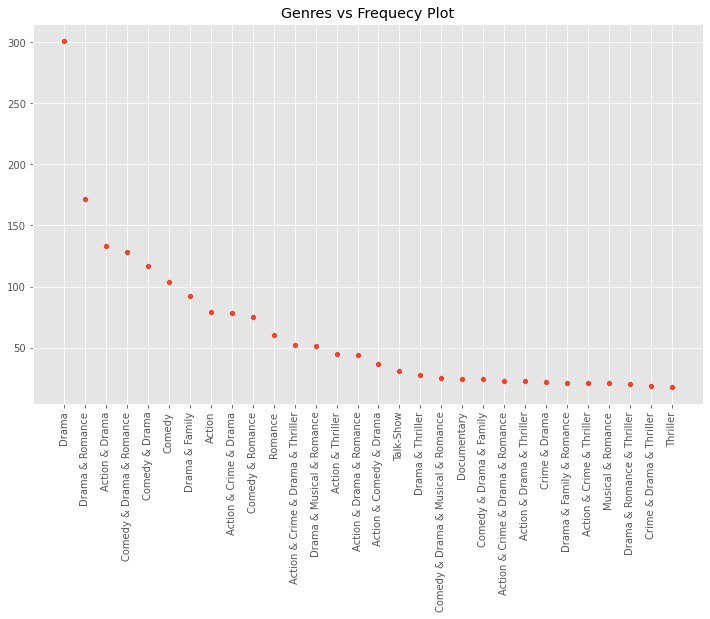

In [176]:
# Plot the 'count'
plt.figure(figsize=(12, 7))
# h = sns.histplot(x=count.index, y=count.values)
h = sns.scatterplot(x=count.index, y=count.values)
t = plt.xticks(rotation=90)
ti = plt.title('Genres vs Frequecy Plot')

In [177]:
# target_df.to_csv('final_file.csv', index=False)